This notebook was created by Louis Moresi and provided to Daan Reijnders on 3 October 2019.

#### Example  - Making a mesh of Hexagons

Though there are a few pentagons in here as well.

In [1]:
import stripy as stripy
import numpy as np

### Uniform meshes by refinement

Let us start with an icosohedral mesh with a reasonable number of points


In [2]:
ico1 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2)
print("Size of mesh - 1  {}".format(ico1.npoints))
facepoints_lons, facepoints_lats = ico1.face_midpoints()

Size of mesh - 1  162


## Identify simplices by hexagon

We can compute all of the face centroids very easily using the `face_midpoints` method and 
add these into another mesh. The ordering of the points is preserved here so we can now identify the 
original points and tag them. 

Each simplex in the new mesh touches exactly one of the original points at a vertex and so that is how 
we can now bundle the mesh into hexagons. There are, 12 pentagon points that arise from the symmetry of the 
icosahedron (recall the C60 mesh has this symmetry from the truncation of the icosahedron).


In [4]:
icof = stripy.sTriangulation(np.hstack((ico1.lons, facepoints_lons)), np.hstack((ico1.lats, facepoints_lats)))
identifier = np.ones(icof.npoints)
identifier[ico1.npoints:] = 0 # make index of last face 0

In [4]:
## Now identify each simplex with the number of the original point that it touches (should be only one ... let's check)

print(identifier[icof.simplices].sum(axis=1).max())

## Good ... so this should identify them all 

hex_id = icof.simplices[np.where(identifier[icof.simplices] == 1.0)]
hex_id.max()


1.0


161

In [26]:
print(ico1.lons.shape)

(162,)


In [28]:
%%timeit
icof.containing_triangle(ico1.lons, ico1.lats)

9.55 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
vals, counts = np.unique(hex_id, return_counts=True)
np.unique(counts, return_counts=True)

(array([5, 6]), array([ 12, 150]))

In [18]:
icof.__dict__

{'permute': False,
 'tree': False,
 '_permutation': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,


In [13]:
icof._permutation.shape

(482,)

In [14]:
icof.lons.shape

(482,)

### Visualisation of patchwork 


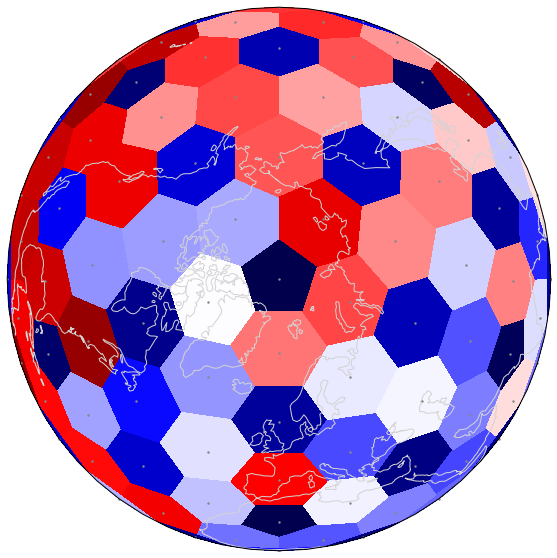

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

import cartopy
import cartopy.crs as ccrs

def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0, globe=None))
    ax.coastlines(color="lightgrey")
    ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr

    ax.scatter(lons0, lats0, color="#888888",
                marker="o", s=2.0, transform=ccrs.Geodetic(), zorder=2)
   
    ax.tripcolor(  lonsR, latsR, triangles=icof.simplices, facecolors=hex_id, transform=ccrs.Geodetic(), zorder=1, cmap=cm.seismic )

    fig.savefig(name, dpi=250, transparent=True)
    
    return


mesh_fig(ico1,        icof,     "Hexagons" )
